# tmdb movies 2nd udacity project

**presented by: Sahar Abdullbasit Yamani**


##  Questions i had in this dataset
1- does the budget affect the popularity of real movies? 


2- What are the top 5 movies with the highest popularity?


3- which value has the highest/lowest overall value?

<a id='wrangling'></a>
## start with importing and downloading the data


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#reading the data set
df = pd.read_csv("/Users/saharay/Desktop/tmdb-movies udacity.csv")
df.head()

,d,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
# to see how much data column we do have 
df.shape

(10866, 21)

In [4]:
#statisces analysis
df.describe()

,d,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='wrangling'></a>
## Data Wrangling

In [5]:
#drop some column that i'm not going to use
df.drop(['d', 'homepage', 'vote_count', 'tagline', 'overview'], axis = 1, inplace = True)
df.head()


,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,6.5,2015,137999939.3,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,137999939.3,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015,101199955.5,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015,183999919.0,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,7.3,2015,174799923.1,1.385749e+09


In [6]:
#to know the missing values 
df.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#drop again another 2 columns 
df.drop(['imdb_id', 'production_companies'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,06/09/2015,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,101199955.5,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,183999919.0,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,04/01/2015,7.3,2015,174799923.1,1.385749e+09


In [8]:
df.rename(columns = {'original_title': 'title'}, inplace=True)
df.head()

,popularity,budget,revenue,title,cast,director,keywords,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,06/09/2015,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,101199955.5,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,183999919.0,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,04/01/2015,7.3,2015,174799923.1,1.385749e+09


In [9]:
#duplicated columns
df.duplicated().sum()

1

In [10]:
#which columns has duplicated in the dataset? TEKKEN
df[df.duplicated()]

,popularity,budget,revenue,title,cast,director,keywords,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,5.0,2010,30000000.0,967000.0


In [11]:
#drop one of them
df.drop_duplicates(inplace = True) #it wont show anything if the rows has removed
df.duplicated().sum() # so to make sure that there is no duplication anymore = 0

0

In [12]:
df.shape

(10865, 14)

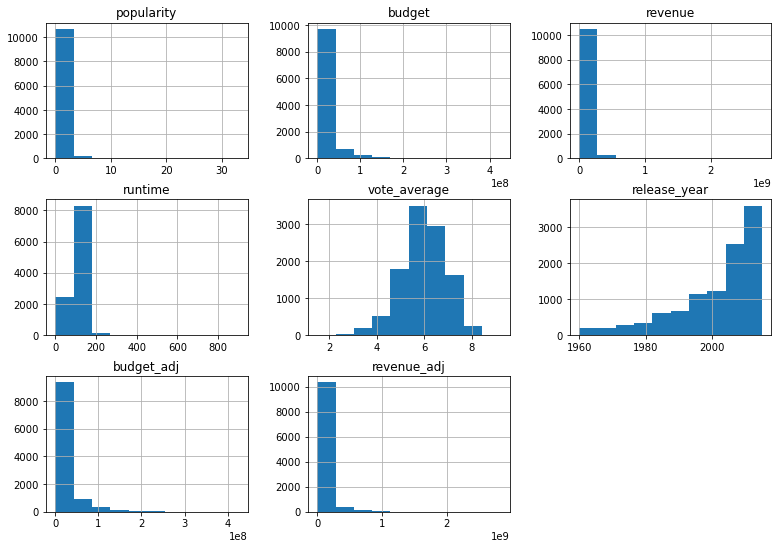

In [13]:
#get the figure size 
df.hist(figsize = (13, 9));

<a id='wrangling'></a>
## Exploratory Data Analysis

In [14]:
#now after done with the cleaning, i'll go to the Explantory
popularity = df.popularity == True
no_popularity = df.popularity == False

budget = df.budget == True

### Research Question 1: does the budget affect the popularity of real movies?

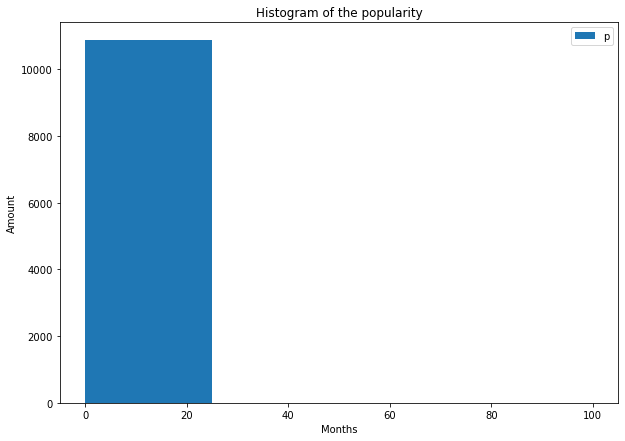

In [19]:
#(using histogram)
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(popularity, bins = [0, 25, 50, 75, 100])

np.where(ax,255,0)

plt.legend('popularity')

plt.title('Histogram of the popularity')
plt.ylabel('Amount')
plt.xlabel('Months')

plt.show()

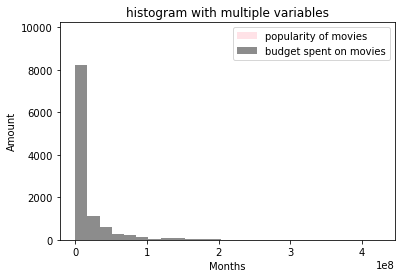

In [26]:
# (using histograms) on the same axis

#***they are the same. so the pink color won't shown because it is same as the black color.
plt.hist(df['popularity'], bins=25, alpha=0.45, color='pink')
plt.hist(df['budget'], bins=25, alpha=0.45, color='black')

#set a title
plt.title("histogram with multiple variables")

plt.legend(['popularity of movies', 
            'budget spent on movies'])

#to add labels name in every axsis
plt.xlabel("Months")
plt.ylabel("Amount")

plt.show()

In [20]:
#to sort the movies first
df.sort_values
df.head()

,popularity,budget,revenue,title,cast,director,keywords,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,06/09/2015,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,101199955.5,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,183999919.0,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,04/01/2015,7.3,2015,174799923.1,1.385749e+09


### Research Question 2: What are the top 5 movies with the highest popularity?

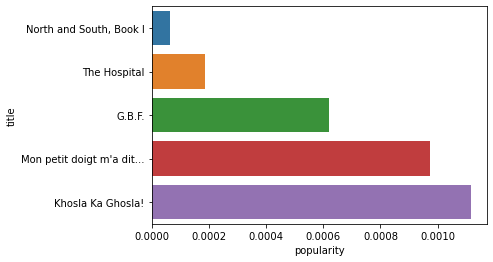

In [21]:
#(using barplot)
sns.barplot(x='popularity',
            y='title',
            data=df.sort_values('popularity').head(5));

### Question 3: which value has the highest/lowest overall value?

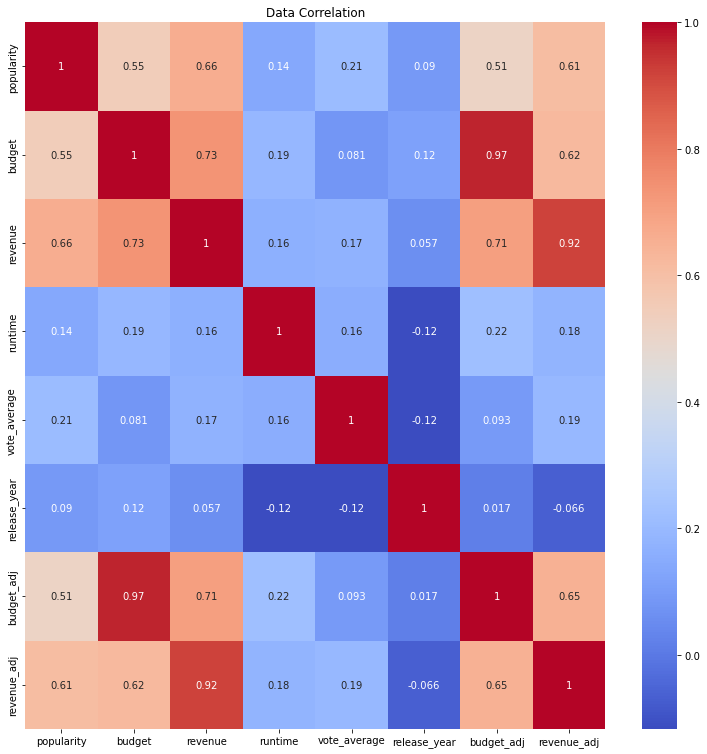

In [22]:
#(using heatmap)
correlation = df.corr()

plt.figure (figsize=(13,13))
ax = sns.heatmap(correlation, annot =True, cmap="coolwarm")
ax.set_title("Data Correlation");

## Conclusion 
I will abbreviation conclusion in points:


1-	The Average Movies Profit increased over time.  

2-	There is a Positive relationship between popularity and budget.

3-	popularity and revenue have a strong correlation, which means the more the film becomes popular. More revenue will come.

4-	release year and runtime have an Inverse relationship. So, we can say that over the years. People still want to watch a long movie runtime without being bored while watching.

## Limitations
1- there is a lot of missing data. even after the cleaning phase there's still a lot of NAN values there which means that the dataset still insufficient.

2- since this dataset is rich of information. i had a lot of obstacles during the cleaning phase. because even if i filled that missing data. the the plotting information goes worng. so i had to take different ways to make a correct invistigation.